# Exercise 1: Linear Regression

### This notebook is executed automatically. Failing to meet any of the submission requirements will results in a 25 point fine or your submission not being graded at all. Kindly reminder: the homework assignments grade is 50% of the final grade. 

### Make sure you restart the notebook and check the filename before submission. Appeals based on wrong filenames and errors due to syntax and execution errors will not be accepted.

### Do not start the exercise until you fully understand the submission guidelines.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw1_123456789_987654321.ipynb` if you submitted in pairs and `hw1_123456789.ipynb` if you submitted the exercise alone.
1. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
1. Write your functions in this notebook only. **Do not create Python modules and import them**.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. **Do not import anything else.**
1. Your code must run without errors. Make sure your `numpy` version is at least 1.15.4 and that you are using at least python 3.6. Changes of the configuration we provided are at your own risk. Any code that cannot run will not be graded.
1. Write your own code. Cheating will not be tolerated.
1. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.

## In this exercise you will perform the following:
1. Load a dataset and perform basic data exploration using a powerful data science library called [pandas](https://pandas.pydata.org/pandas-docs/stable/).
1. Preprocess the data for linear regression.
1. Compute the cost and perform gradient descent in pure numpy in vectorized form.
1. Fit a linear regression model using a single feature.
1. Visualize your results using matplotlib.
1. Perform multivariate linear regression.
1. Perform polynomial regression.
1. Experiment with adaptive learning rates.

# I have read and understood the instructions: 203972922 201312907

In [165]:
import numpy as np # used for scientific computing
import pandas as pd # used for data analysis and manipulation
import matplotlib.pyplot as plt # used for visualization and plotting

np.random.seed(42) 

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Part 1: Data Preprocessing (10 Points)

For the following exercise, we will use a dataset containing housing prices in King County, USA. The dataset contains 5,000 observations with 18 features and a single target value - the house price. 

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

## insert path in your local computer

In [166]:
executor = 'roy'
if executor == 'or':
    path = r"C:\MSC\ML\hw\HW1\data.csv"
else:
    path = r'data.csv'

In [167]:
# Read comma separated data
df = pd.read_csv(path) # Make sure this cell runs regardless of your absolute path.
# df stands for dataframe, which is the default format for datasets in pandas

### Data Exploration
A good practice in any data-oriented project is to first try and understand the data. Fortunately, pandas is built for that purpose. Start by looking at the top of the dataset using the `df.head()` command. This will be the first indication that you read your data properly, and that the headers are correct. Next, you can use `df.describe()` to show statistics on the data and check for trends and irregularities.

In [168]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [169]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,5.000000e+03,5.000000e+03,5000.0000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,4.630823e+09,5.394699e+05,3.3714,2.062150,2061.036800,1.615893e+04,1.432600,0.009400,0.243000,3.455000,7.595200,1753.151000,1966.660800,95.052800,98078.812600,47.559312,-122.215864,1976.84520,13451.164600
std,2.870890e+09,3.873115e+05,0.9104,0.773592,923.727509,4.600220e+04,0.510793,0.096506,0.774643,0.677692,1.166537,818.390844,28.286855,425.234932,54.126332,0.139521,0.141807,674.73601,26514.749009
min,1.000102e+06,7.500000e+04,0.0000,0.000000,380.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.00000,660.000000
25%,2.154075e+09,3.179062e+05,3.0000,1.500000,1410.000000,5.400000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1949.000000,0.000000,98033.000000,47.463675,-122.329000,1490.00000,5391.500000
50%,4.022900e+09,4.490000e+05,3.0000,2.000000,1890.000000,7.875000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,1968.000000,0.000000,98070.000000,47.572850,-122.235000,1820.00000,7800.000000
75%,7.345078e+09,6.500000e+05,4.0000,2.500000,2500.000000,1.123400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,1990.000000,0.000000,98118.000000,47.679200,-122.129000,2340.00000,10469.250000
max,9.842300e+09,7.060000e+06,9.0000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7680.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.00000,434728.000000


We will start with one variable linear regression by extracting the target column and the `sqft_living` variable from the dataset. We use pandas and select both columns as separate variables and transform them into a numpy array.

In [170]:
X = df['sqft_living'].values
y = df['price'].values

## Preprocessing

As the number of features grows, calculating gradients gets computationally expensive. We can speed this up by normalizing the input data to ensure all values are within the same range. This is especially important for datasets with high standard deviations or differences in the ranges of the attributes. Use [mean normalization](https://en.wikipedia.org/wiki/Feature_scaling) for the fearures (`X`) and the true labels (`y`).

Implement the cost function `preprocess`.

In [171]:
def mean_normalization(data):
    data = np.float32(data)
    data_shape  = data.shape
    data_normelized = data.copy()
    if data_shape.__len__() == 1:
        data.resize((data.size, 1))
        data_shape = data.shape
        data_normelized = data.copy()

    for i_feature in range (0, data_shape[1]):
        data_mean  = np.mean(data[:,i_feature])
        data_min  = np.min(data[:,i_feature])
        data_max  = np.max(data[:,i_feature])
        data_normelized[:,i_feature] = (data[:,i_feature]-data_mean)/(data_max-data_min)
    
    return data_normelized

In [172]:
def preprocess(X, y):
    """
    Perform mean normalization on the features and true labels.

    Input:
    - X: Inputs (n features over m instances).
    - y: True labels.

    Returns a two vales:
    - X: The mean normalized inputs.
    - y: The mean normalized labels.
    """
    ###########################################################################
    # TODO: Implement the normalization function.                             #
    ###########################################################################
    X = mean_normalization(X)
    y = mean_normalization(y)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return X, y

In [173]:
X, y = preprocess(X, y)

We will split the data into two datasets: 
1. The training dataset will contain 80% of the data and will always be used for model training.
2. The validation dataset will contain the remaining 20% of the data and will be used for model evaluation. For example, we will pick the best alpha and the best features using the validation dataset, while still training the model using the training dataset.

In [174]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]

## Data Visualization
Another useful tool is data visualization. Since this problem has only two parameters, it is possible to create a two-dimensional scatter plot to visualize the data. Note that many real-world datasets are highly dimensional and cannot be visualized naively. We will be using `matplotlib` for all data visualization purposes since it offers a wide range of visualization tools and is easy to use.

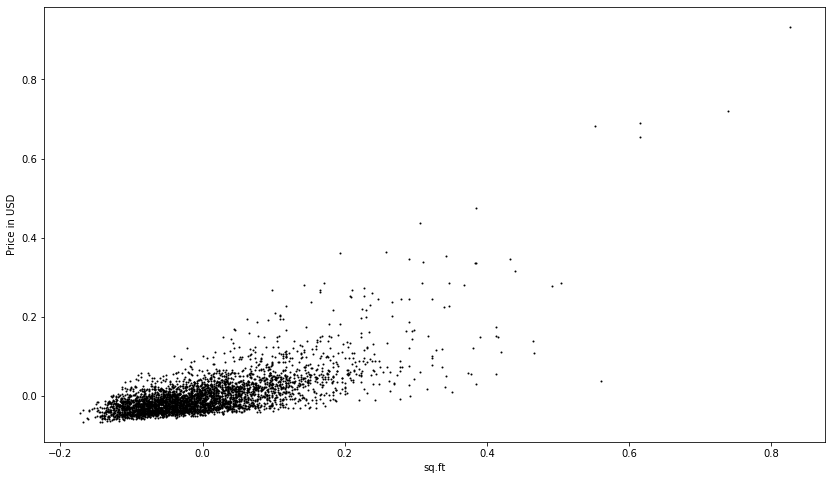

In [175]:
plt.plot(X_train, y_train, 'ro', ms=1, mec='k') # the parameters control the size, shape and color of the scatter plot
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.show()

## Bias Trick

Make sure that `X` takes into consideration the bias $\theta_0$ in the linear model. Hint, recall that the predications of our linear model are of the form:

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

Add columns of ones as the zeroth column of the features (do this for both the training and validation sets).

In [176]:
def add_bias_to_X(X):
    one_columns  = np.ones((X.shape[0],1))
    X = np.concatenate((one_columns, X), axis = 1)
    return X

In [177]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
X = add_bias_to_X(X)

## update train and test sets after applying the bias trick
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

## Part 2: Single Variable Linear Regression (40 Points)
Simple linear regression is a linear regression model with a single explanatory varaible and a single target value. 

$$
\hat{y} = h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

## Gradient Descent 

Our task is to find the best possible linear line that explains all the points in our dataset. We start by guessing initial values for the linear regression parameters $\theta$ and updating the values using gradient descent. 

The objective of linear regression is to minimize the cost function $J$:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{n}(h_\theta(x^{(i)})-y^{(i)})^2
$$

where the hypothesis (model) $h_\theta(x)$ is given by a **linear** model:

$$
h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1
$$

$\theta_j$ are parameters of your model. and by changing those values accordingly you will be able to lower the cost function $J(\theta)$. One way to accopmlish this is to use gradient descent:

$$
\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
$$

In linear regresion, we know that with each step of gradient descent, the parameters $\theta_j$ get closer to the optimal values that will achieve the lowest cost $J(\theta)$.

Implement the cost function `compute_cost`. (10 points)

In [178]:
def compute_cost(X, y, theta):
    """
    Computes the average squared difference between an obserbation's actual and
    predicted values for linear regression.  

    Input:
    - X: inputs  (n features over m instances).
    - y: true labels (1 value over m instances).
    - theta: the parameters (weights) of the model being learned.

    Returns a single value:
    - J: the cost associated with the current set of parameters (single number).
    """
    
    J = 0  # Use J for the cost.
    ###########################################################################
    # TODO: Implement the MSE cost function.                                  #
    ###########################################################################
    
    theta = theta.reshape((1,theta.size))

    A = y 
    B = np.matmul(X, np.transpose(theta))
    mse = (np.square(A - B)).mean(axis=0)[0]
    if mse > 1000: # diffence for case of unconvergence
        mse = 2000
    J = (mse/2)
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return J

In [179]:
%%time
theta = np.array([-1, 2])
J = compute_cost(X_train, y_train, theta)

CPU times: user 293 µs, sys: 111 µs, total: 404 µs
Wall time: 320 µs


Implement the gradient descent function `gradient_descent`. (10 points)

In [180]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of the model using gradient descent using 
    the *training set*. Gradient descent is an optimization algorithm 
    used to minimize some (loss) function by iteratively moving in 
    the direction of steepest descent as defined by the negative of 
    the gradient. We use gradient descent to update the parameters
    (weights) of our model.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    J_history = [] # Use a python list to save cost in every iteration
    theta = theta.copy() # avoid changing the original thetas
    ###########################################################################
    # TODO: Implement the gradient descent optimization algorithm.            #
    ###########################################################################
    theta = theta.reshape((1,theta.size))
    sample_size = y.size
    # iterate to perform gradient descent
    for i_iteration in range(0, num_iters):
        # Calculate new theta
        error_vec = (np.matmul(theta,np.transpose(X)) - np.transpose(y)) # 1Xsample_size
        sumation = np.matmul(error_vec,X) # 1Xsample_size X sample_sizeX2 = 1X2
        new_theta_vec = theta - (alpha/sample_size)*sumation # 1X2 - 1X2
        theta = new_theta_vec.copy() # avoid changing the original thetas
        
        # Check if gradients 'exploded' during the iteration
        if (False in np.isfinite(new_theta_vec)):
            print(f'gradients exploded, stopping the for loop at iteration {i_iteration}. alpha is: {alpha}')
            break
            
        # compute cost function to keep track of the loss value during the gradient descent steps
        current_J = compute_cost(X, y, new_theta_vec)
        J_history.append(current_J)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return theta, J_history

In [181]:
%%time
np.random.seed(42)
theta = np.random.random(size=2)
iterations = 40000
alpha = 0.1
theta, J_history = gradient_descent(X_train ,y_train, theta, alpha, iterations)

CPU times: user 3.51 s, sys: 57.2 ms, total: 3.57 s
Wall time: 3.83 s


You can evaluate the learning process by monitoring the loss as training progress. In the following graph, we visualize the loss as a function of the iterations. This is possible since we are saving the loss value at every iteration in the `J_history` array. This visualization might help you find problems with your code. Notice that since the network converges quickly, we are using logarithmic scale for the number of iterations. 

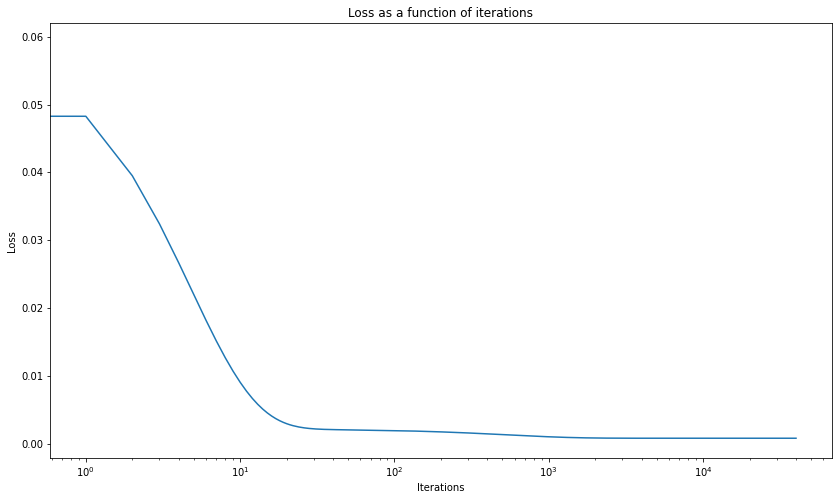

In [182]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.show()

Implement the pseudo-inverse function `pinv`. **Do not use `np.linalg.pinv`**, instead use only direct matrix multiplication as you saw in class (you can calculate the inverse of a matrix using `np.linalg.inv`). (10 points)

In [183]:
def pinv(X, y):
    """
    Calculate the optimal values of the parameters using the pseudoinverse
    approach as you saw in class using the *training set*.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).

    Returns two values:
    - theta: The optimal parameters of your model.

    ########## DO NOT USE np.linalg.pinv ##############
    """
    
    pinv_theta = []
    ###########################################################################
    # TODO: Implement the pseudoinverse algorithm.                            #
    ###########################################################################
    X_T = np.transpose(X)
    X_T_X = np.matmul(X_T, X)
    inverse_X_T_X = np.linalg.inv(X_T_X+(1e-9)*np.eye(X_T_X.shape[0]))      #TODO: question for OR - what is this ?
    X_T_X_X_T = np.matmul(inverse_X_T_X, X_T)
    pinv_theta = np.transpose(np.matmul(X_T_X_X_T, y))
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return pinv_theta

In [184]:
%%time
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

CPU times: user 1.3 ms, sys: 3.25 ms, total: 4.55 ms
Wall time: 8.41 ms


We can add the loss value for the theta calculated using the psuedo-inverse to our graph. This is another sanity check as the loss of our model should converge to the psuedo-inverse loss.

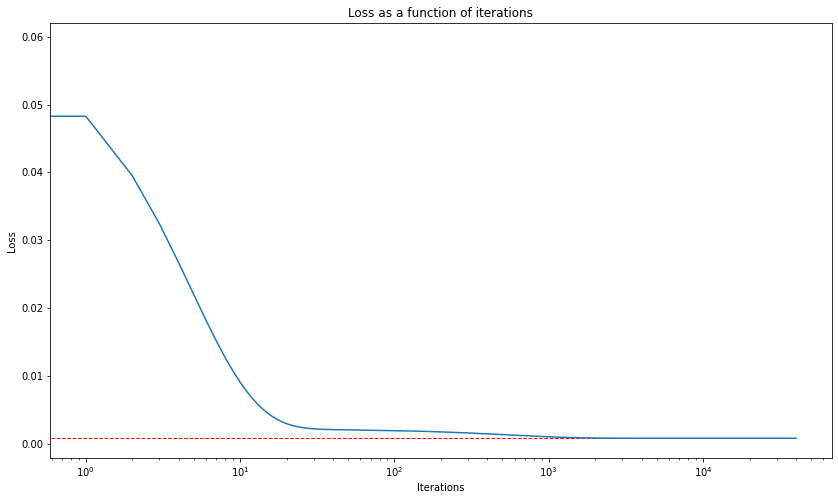

In [185]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

We can use a better approach for the implementation of `gradient_descent`. Instead of performing 40,000 iterations, we wish to stop when the improvement of the loss value is smaller than `1e-8` from one iteration to the next. Implement the function `efficient_gradient_descent`. (5 points)

In [186]:
def efficient_gradient_descent(X, y, theta, alpha, num_iters):
    """
    Learn the parameters of your model using the *training set*, but stop 
    the learning process once the improvement of the loss value is smaller 
    than 1e-8. This function is very similar to the gradient descent 
    function you already implemented.

    Input:
    - X: Inputs  (n features over m instances).
    - y: True labels (1 value over m instances).
    - theta: The parameters (weights) of the model being learned.
    - alpha: The learning rate of your model.
    - num_iters: The number of updates performed.

    Returns two values:
    - theta: The learned parameters of your model.
    - J_history: the loss value for every iteration.
    """
    
    J_history = [] # Use a python list to save cost in every iteration
    theta = theta.copy() # avoid changing the original thetas
    ###########################################################################
    # TODO: Implement the gradient descent optimization algorithm.            #
    ###########################################################################
    desired_loss_value = 1e-8
    theta = theta.reshape((1,theta.size))
    sample_size = y.size
    # this loop run on iterations
    for i_iteration in range(0, num_iters):
        # Calculate new theta
        error_vec = (np.matmul(theta,np.transpose(X)) - np.transpose(y)) # 1Xsample_size
        sumation = np.matmul(error_vec,X) # 1Xsample_size X sample_sizeX2 = 1X2
        new_theta_vec = theta - (alpha/sample_size)*sumation # 1X2 - 1X2
        theta = new_theta_vec.copy() # avoid changing the original thetas
        
        # Check if gradients 'exploded' during the iteration
        if (False in np.isfinite(new_theta_vec)):
            print(f'gradients exploded, stopping the for loop at iteration {i_iteration}. alpha is: {alpha}')
            break
            
        # compute cost function to keep track of the loss value during the gradient descent steps
        current_J = compute_cost(X, y, new_theta_vec)
        J_history.append(current_J)
        
        # Early stop condition by the desired loss value
        if desired_loss_value > current_J:
            break
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return theta, J_history

The learning rate is another factor that determines the performance of our model in terms of speed and accuracy. Complete the function `find_best_alpha`. Make sure you use the training dataset to learn the parameters (thetas) and use those parameters with the validation dataset to compute the cost.

In [187]:
def find_best_alpha(X_train, y_train, X_val, y_val, iterations):
    """
    Iterate over provided values of alpha and train a model using the 
    *training* dataset. maintain a python dictionary with alpha as the 
    key and the loss on the *validation* set as the value.

    Input:
    - X_train, y_train, X_val, y_val: the training and validation data
    - iterations: maximum number of iterations

    Returns:
    - alpha_dict: A python dictionary - {key (alpha) : value (validation loss)}
    """
    
    alphas = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 2, 3]
    alpha_dict = {}
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    for current_alpha in alphas:
        #alpha_dict[current_alpha] =  40000
        initial_theta = np.array([[-1, 2]])
        suggested_theta, J_history = efficient_gradient_descent(X_train, y_train, initial_theta, current_alpha, iterations)
        validation_J_for_specific_alphas = compute_cost(X_val, y_val, suggested_theta)
        alpha_dict[current_alpha] =  validation_J_for_specific_alphas
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return alpha_dict

In [188]:
%%time
alpha_dict = find_best_alpha(X_train, y_train, X_val, y_val, 40000)

gradients exploded, stopping the for loop at iteration 1013. alpha is: 3
CPU times: user 36.4 s, sys: 257 ms, total: 36.6 s
Wall time: 36.9 s


/Users/royrubin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/0f/27_6jz_d76qdtz0_10p1wjxr0000gp/T/ipykernel_9052/394695580.py:24: RuntimeWarning: overflow encountered in square
  mse = (np.square(A - B)).mean(axis=0)[0]
/var/folders/0f/27_6jz_d76qdtz0_10p1wjxr0000gp/T/ipykernel_9052/4250124015.py:32: RuntimeWarning: overflow encountered in matmul
  sumation = np.matmul(error_vec,X) # 1Xsample_size X sample_sizeX2 = 1X2


In [189]:
alpha_dict

{1e-05: 0.240805167610731,
 3e-05: 0.05912042723067897,
 0.0001: 0.01143228916375216,
 0.0003: 0.009712817653936664,
 0.001: 0.0061045956898615385,
 0.003: 0.0019733802334416413,
 0.01: 0.0007206286019496724,
 0.03: 0.0007084316421094787,
 0.1: 0.0007084282867258762,
 0.3: 0.0007084282867258733,
 1: 0.0007084282867258723,
 2: 0.5972251132648022,
 3: 1000.0}

Obtain the best learning rate from the dictionary `alpha_dict`. This can be done in a single line using built-in functions.

In [190]:
best_alpha = None
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
best_alpha, best_cost_value = min(alpha_dict.items(), key=lambda x: x[1])
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################
print(best_alpha)
# print(best_cost_value)

1


Pick the best three alpha values you just calculated and provide **one** graph with three lines indicating the training loss as a function of iterations (Use 10,000 iterations). Note you are required to provide general code for this purpose (no hard-coding). Make sure the visualization is clear and informative. (5 points)

In [191]:
def find_k_best_alphas(k:int, alphas_dict: dict):
    data_array = np.array(list(alpha_dict.items()))
    mse_values = data_array[:,1]
    alpha_values = data_array[:,0]
    three_best_mse_index = mse_values.argsort()[0:k][::-1]
    best_alphas = np.take(alpha_values, three_best_mse_index)
    return best_alphas

In [192]:
def get_training_loss_for_given_alphas(alphas):
    desire_amount_of_iterations = 10000
    initial_theta = np.array([[-1, 2]])
    training_loss_by_alpha = {}
    for current_alpha in alphas:
        suggested_theta, J_history = efficient_gradient_descent(X_train, y_train, initial_theta, current_alpha, desire_amount_of_iterations)
        training_loss_by_alpha[current_alpha] =  J_history
    
    return training_loss_by_alpha

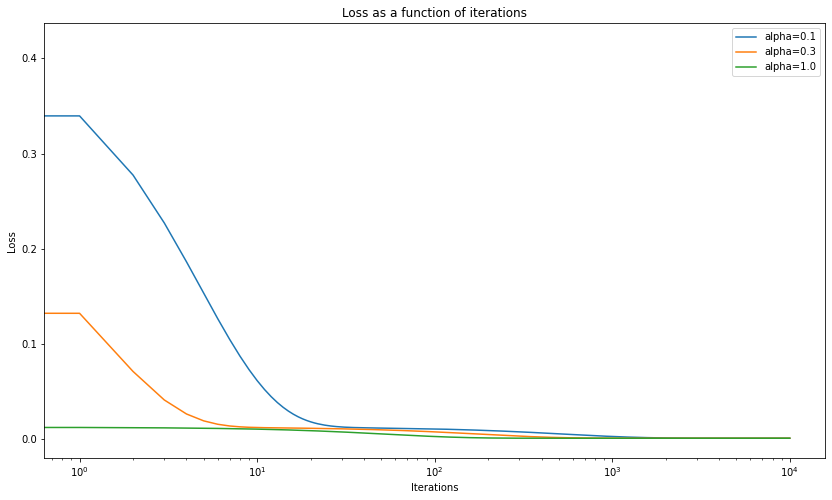

CPU times: user 2.84 s, sys: 29.1 ms, total: 2.87 s
Wall time: 2.91 s


In [193]:
%%time
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################

best_alphas = find_k_best_alphas(k=3, alphas_dict=alpha_dict)
training_loss_by_alpha = get_training_loss_for_given_alphas(best_alphas)

plt.figure(0)
for alpha, loss in training_loss_by_alpha.items():
    plt.plot(np.arange(len(loss)), loss, label=f'alpha={alpha}')

plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.legend()
plt.show()
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

This is yet another sanity check. This function plots the regression lines of your model and the model based on the pseudoinverse calculation. Both models should exhibit the same trend through the data. 

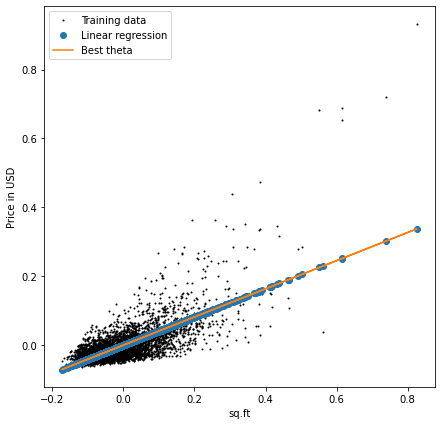

In [194]:
plt.figure(figsize=(7, 7))
plt.plot(X_train[:,1], y_train, 'ro', ms=1, mec='k')
plt.ylabel('Price in USD')
plt.xlabel('sq.ft')
plt.plot(X_train[:, 1], np.dot(X_train, np.transpose(theta)), 'o') # mybe note transpose reason
plt.plot(X_train[:, 1], np.dot(X_train, np.transpose(theta_pinv)), '-')

plt.legend(['Training data', 'Linear regression', 'Best theta']);

## Part 2: Multivariate Linear Regression (30 points)

In most cases, you will deal with databases that have more than one feature. It can be as little as two features and up to thousands of features. In those cases, we use a multiple linear regression model. The regression equation is almost the same as the simple linear regression equation:

$$
\hat{y} = h_\theta(\vec{x}) = \theta^T \vec{x} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n
$$


If you wrote vectorized code, this part should be straightforward. If your code is not vectorized, you should go back and edit your functions such that they support both multivariate and single variable regression. **Your code should not check the dimensionality of the input before running**.

In [195]:
# Read comma separated data
df = pd.read_csv(path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


## Preprocessing

Like in the single variable case, we need to create a numpy array from the dataframe. Before doing so, we should notice that some of the features are clearly irrelevant.

In [196]:
X = df.drop(columns=['price', 'id', 'date']).values
y = df['price'].values

Use the **same** `preprocess` function you implemented previously. Notice that proper vectorized implementation should work regardless of the dimensionality of the input. You might want to check that your code in the previous parts still works.

In [197]:
%%time
# preprocessing
X, y = preprocess(X, y)

CPU times: user 3.31 ms, sys: 1.63 ms, total: 4.94 ms
Wall time: 4.41 ms


In [198]:
# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

Using 3D visualization, we can still observe trends in the data. Visualizing additional dimensions requires advanced techniques we will learn later in the course.

/var/folders/0f/27_6jz_d76qdtz0_10p1wjxr0000gp/T/ipykernel_9052/187571787.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


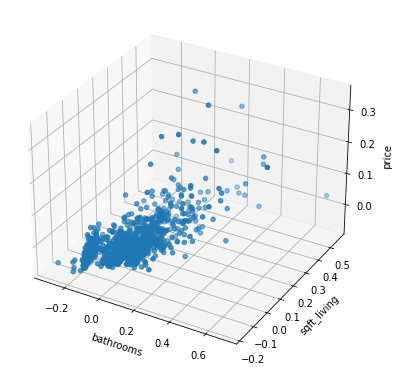

In [199]:
%matplotlib inline
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure(figsize=(5,5))
ax = p3.Axes3D(fig)
xx = X_train[:, 1][:1000]
yy = X_train[:, 2][:1000]
zz = y_train[:1000]
ax.scatter(xx, yy, zz, marker='o')
ax.set_xlabel('bathrooms')
ax.set_ylabel('sqft_living')
ax.set_zlabel('price')
plt.show()

Use the bias trick again (add a column of ones as the zeroth column in the both the training and validation datasets).

In [200]:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################
X = add_bias_to_X(X)
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

Make sure the functions `compute_cost` (10 points), `gradient_descent` (15 points), and `pinv` (5 points) work on the multi-dimensional dataset. If you make any changes, make sure your code still works on the single variable regression model. 

In [201]:
%%time
shape = X_train.shape[1] # validate no check shape by orig ex
theta = np.ones(shape)
J = compute_cost(X_train, y_train, theta)

CPU times: user 792 µs, sys: 364 µs, total: 1.16 ms
Wall time: 863 µs


In [202]:
%%time
np.random.seed(42)
shape = X_train.shape[1]
theta = np.random.random(shape)
iterations = 40000
theta, J_history = gradient_descent(X_train ,y_train, theta, best_alpha, iterations)

CPU times: user 14.1 s, sys: 2.43 s, total: 16.5 s
Wall time: 13.5 s


In [203]:
%%time
theta_pinv = pinv(X_train ,y_train)
J_pinv = compute_cost(X_train, y_train, theta_pinv)

CPU times: user 2.95 ms, sys: 4.78 ms, total: 7.74 ms
Wall time: 11.5 ms


We can use visualization to make sure the code works well. Notice we use logarithmic scale for the number of iterations, since gradient descent converges after ~500 iterations.

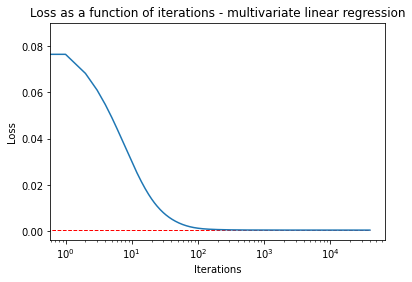

In [204]:
plt.plot(np.arange(iterations), J_history)
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations - multivariate linear regression')
plt.hlines(y = J_pinv, xmin = 0, xmax = len(J_history), color='r',
           linewidth = 1, linestyle = 'dashed')
plt.show()

In [205]:
%%time
'''
This block was added to Part2 by us to compare with the next section later on
'''
# assumption
best_theta = theta_pinv

# evaluate train dataet
y_train_true = y_train
y_train_pred = np.matmul(X_train, best_theta.transpose())
train_mse_cost = (np.square(y_train_pred - y_train_true)).mean(axis=0)[0]

# evaluate test dataet
y_val_true = y_val
y_val_pred = np.matmul(X_val, best_theta.transpose())
test_mse_cost = (np.square(y_val_pred - y_val_true)).mean(axis=0)[0]

print(f'Training MSE cost: {train_mse_cost}')
print(f'Testing MSE cost: {test_mse_cost}')
if train_mse_cost < test_mse_cost:
    print(f'Train MSE is better than the Test MSE')
else:
    print(f'Test MSE is better than the Train MSE')

Training MSE cost: 0.0009398009115242683
Testing MSE cost: 0.0008471870323224421
Test MSE is better than the Train MSE
CPU times: user 2.42 ms, sys: 2.05 ms, total: 4.46 ms
Wall time: 3.96 ms


## Part 3: Polynomial Regression (10 points)

Linear Regression allows us to explore linear relationships but if we need a model that describes non-linear dependencies we can also use Polynomial Regression. In order to perform polynomial regression, we create additional features using a function of the original features and use standard linear regression on the new features. For example, consider the following single variable $(x)$ cubic regression:

$$ x_0 = 1, \space x_1 = x, \space x_2 = x^2, \space x_3 = x^3$$

And after using standard linear regression:

$$ f(x) = \theta_0 + \theta_1 x + \theta_2 x^2 +  \theta_3 x^3$$

As required. 

For this exercise, use polynomial regression by using all **quadratic** feature combinations: 

$$ 1, x, y, z, x^2, y^2, z^2, xy, xz, yz, ...$$

and evaluate the MSE cost on the training and testing datasets.

### Step 1: generate new features

In [206]:
columns_to_drop = ['price', 'id', 'date']
all_features = df.drop(columns=columns_to_drop)
all_features.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [207]:
def generate_new_features(all_features):
    #preparations
    amount_of_features = all_features.shape[1]
    X = all_features.values
    columns_list = all_features.columns.to_list()
    array_feature = np.arange(0, amount_of_features) 
    
    # create 
    comb_array = np.array(np.meshgrid(array_feature, array_feature)).T.reshape(-1, 2)
    comb_array = comb_array[::10,:] # reduce amount of coombination
    amount_of_new_features = comb_array.shape[0]
    feaures_sellection_combination_x1 = np.take(X, comb_array[:,0], axis = 1)
    feaures_sellection_combination_x2 = np.take(X, comb_array[:,1], axis = 1)
    feaures_sellection_combination_x1_dot_x2 = np.multiply(feaures_sellection_combination_x1, feaures_sellection_combination_x2)
    index_list1 = comb_array[:,0].tolist()
    index_list2 = comb_array[:,1].tolist()
    new_feature_names = list(map(lambda x,y,z : z[x]+'*'+z[y], index_list1 , index_list2,amount_of_new_features*[columns_list] ))
    all_features[new_feature_names] = feaures_sellection_combination_x1_dot_x2
    return all_features 

In [208]:
%%time
all_features = generate_new_features(all_features)
print(f'all_features.shape {all_features.shape}')
all_features.head(5)

all_features.shape (5000, 46)
CPU times: user 20.2 ms, sys: 5.84 ms, total: 26 ms
Wall time: 28.2 ms


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated*sqft_lot,yr_renovated*lat,zipcode*view,zipcode*sqft_lot15,lat*sqft_above,long*sqft_living,long*zipcode,sqft_living15*waterfront,sqft_living15*sqft_living15,sqft_lot15*grade
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,0.0,0.000,0.0,554705700.0,56063.216,-144263.26,-1.200295e+07,0.0,1795600.0,39550.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,14418822.0,95012.511,0.0,749576875.0,103554.570,-314359.83,-1.200255e+07,0.0,2856100.0,53473.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,0.0,0.000,0.0,790301736.0,36758.183,-94119.41,-1.198226e+07,0.0,7398400.0,48372.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,0.0,0.000,0.0,490680000.0,49896.840,-239890.28,-1.201116e+07,0.0,1849600.0,35000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,0.0,0.000,0.0,735849222.0,79996.224,-205035.60,-1.196944e+07,0.0,3240000.0,60024.0


In [209]:
nunique = all_features.nunique()
cols_to_drop = nunique[nunique == 1].index
all_features.drop(cols_to_drop, axis=1)
print(f'all_features.shape {all_features.shape}')
all_features.head(5)

all_features.shape (5000, 46)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated*sqft_lot,yr_renovated*lat,zipcode*view,zipcode*sqft_lot15,lat*sqft_above,long*sqft_living,long*zipcode,sqft_living15*waterfront,sqft_living15*sqft_living15,sqft_lot15*grade
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,0.0,0.000,0.0,554705700.0,56063.216,-144263.26,-1.200295e+07,0.0,1795600.0,39550.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,14418822.0,95012.511,0.0,749576875.0,103554.570,-314359.83,-1.200255e+07,0.0,2856100.0,53473.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,0.0,0.000,0.0,790301736.0,36758.183,-94119.41,-1.198226e+07,0.0,7398400.0,48372.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,0.0,0.000,0.0,490680000.0,49896.840,-239890.28,-1.201116e+07,0.0,1849600.0,35000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,0.0,0.000,0.0,735849222.0,79996.224,-205035.60,-1.196944e+07,0.0,3240000.0,60024.0


### Step 2: prepare data for training

In [210]:
X = all_features.values
y = df['price'].values

# Preprocess
X, y = preprocess(X, y)

# Bias trick
X =  add_bias_to_X(X)

# training and validation split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

### Step 3: find best alpha, and best theta

In [211]:
def get_best_alpha_and_theta(X_train, y_train, X_val, y_val, iterations):
    # init best variables
    best_alpha = None
    best_theta = None
    best_cost = 100000
    # Set up alphas 
    alphas = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 2, 3]
    # set up initial theta
    shape = X_train.shape[1]
    initial_theta = np.ones(shape)
    # Iterate
    for current_alpha in alphas:        
        suggested_theta, J_history = efficient_gradient_descent(X_train, y_train, initial_theta, current_alpha, iterations)
        cost_value = compute_cost(X_val, y_val, suggested_theta)
        if cost_value < best_cost:
            best_cost = cost_value
            best_alpha = current_alpha
            best_theta = suggested_theta
            
    return best_alpha, best_theta

In [212]:
%%time
best_alpha, best_theta = get_best_alpha_and_theta(X_train, y_train, X_val, y_val, 40000)

temp: cost will now change: current_alpha 1e-05 cost_value 2.1022530959395183 
temp: cost will now change: current_alpha 3e-05 cost_value 1.3996839218835708 
temp: cost will now change: current_alpha 0.0001 cost_value 0.47323911976695876 
temp: cost will now change: current_alpha 0.0003 cost_value 0.1010230631525443 
temp: cost will now change: current_alpha 0.001 cost_value 0.03418394974731659 
temp: cost will now change: current_alpha 0.003 cost_value 0.004595042609397091 
temp: cost will now change: current_alpha 0.01 cost_value 0.0010195869268757052 
temp: cost will now change: current_alpha 0.03 cost_value 0.0005942324893320491 
temp: cost will now change: current_alpha 0.1 cost_value 0.00044370365359049877 
temp: cost will now change: current_alpha 0.3 cost_value 0.0004346443612459716 
temp: cost will now change: current_alpha 1 cost_value 0.0004343920249223113 
gradients exploded, stopping the for loop at iteration 1012. alpha is: 3
CPU times: user 3min 1s, sys: 35.1 s, total: 3

/Users/royrubin/.pyenv/versions/3.8.5/lib/python3.8/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/0f/27_6jz_d76qdtz0_10p1wjxr0000gp/T/ipykernel_9052/394695580.py:24: RuntimeWarning: overflow encountered in square
  mse = (np.square(A - B)).mean(axis=0)[0]
/var/folders/0f/27_6jz_d76qdtz0_10p1wjxr0000gp/T/ipykernel_9052/4250124015.py:32: RuntimeWarning: overflow encountered in matmul
  sumation = np.matmul(error_vec,X) # 1Xsample_size X sample_sizeX2 = 1X2


### Step 4: evaluate MSE cost on the training and testing datasets. 

In [213]:
%%time
# evaluate train dataet
y_train_true = y_train
y_train_pred = np.matmul(X_train, best_theta.transpose())
train_mse_cost = (np.square(y_train_pred - y_train_true)).mean(axis=0)[0]

# evaluate test dataet
y_val_true = y_val
y_val_pred = np.matmul(X_val, best_theta.transpose())
test_mse_cost = (np.square(y_val_pred - y_val_true)).mean(axis=0)[0]

print(f'Training MSE cost: {train_mse_cost}')
print(f'Testing MSE cost: {test_mse_cost}')
if train_mse_cost < test_mse_cost:
    print(f'Train MSE is better than the Test MSE')
else:
    print(f'Test MSE is better than the Train MSE')

Training MSE cost: 0.0007535427494795008
Testing MSE cost: 0.0008687840498446226
Train MSE is better than the Test MSE
CPU times: user 1.05 ms, sys: 486 µs, total: 1.54 ms
Wall time: 1.07 ms


### Step 5: Explain our results 

#### Give an explanation to the results and compare them to regular linear regression. Do they make sense?

The results we recieved were:

with regular linear regression:

> Training MSE cost: 0.0009398009115242683

> Testing MSE cost: 0.0008471870323224421

with polynomial regression:

> Training MSE cost: 0.0007535427494795008

> Testing MSE cost: 0.0008687840498446226

we can see that the training MSE of polynomial regression is better than the linear regression.
this makes sense because using feature engineering we found a model that fits the data better. using the quadratic feature combinations we found relationships between features that were not present before. these relathionships helped us get a better evaluation.

#TODO: show or - test dataset is actually val dataset ?

#TODO: show or - the linear regression did not use find best alpha ?

#TODO: show or - the test evaluation was not as good ... ?

## Part 4: Adaptive Learning Rate (10 points)

So far, we kept the learning rate alpha constant during training. However, changing alpha during training might improve convergence in terms of the global minimum found and running time. Implement the adaptive learning rate method based on the gradient descent algorithm above. 

**Your task is to find proper hyper-parameter values for the adaptive technique and compare this technique to the constant learning rate. Use clear visualizations of the validation loss and the learning rate as a function of the iteration**. 

Time based decay: this method reduces the learning rate every iteration according to the following formula:

$$\alpha = \frac{\alpha_0}{1 + D \cdot t}$$

Where $\alpha_0$ is the original learning rate, $D$ is a decay factor and $t$ is the current iteration.

### Step 1: prepare functions

In [236]:
def adaptive_efficient_gradient_descent(X, y, theta, initial_alpha, num_iters, D):
    desired_error = 1e-8
    theta = theta.reshape((1,theta.size))
    theta = theta.copy() # avoid changing the original thetas
    sample_size = y.size
    # prepare variables for history output
    J_history = [] # Use a python list to save cost in every iteration
    alpha_history = [] # Use a python list to save cost in every iteration   
    # this loop run on iterations
    for t in range(0, num_iters):
        # calculate new alpha using the decay factor
        new_alpha  = (initial_alpha)/(1 + D*t)
        alpha_history.append(new_alpha)
        
        # calculate new theta
        error_vec = (np.matmul(theta,np.transpose(X)) - np.transpose(y)) # 1Xsample_size
        sumation = np.matmul(error_vec,X) # 1Xsample_size X sample_sizeX2 = 1X2
        new_theta_vec = theta - (new_alpha/sample_size)*sumation # 1X2 - 1X2
        theta = new_theta_vec.copy() # avoid changing the original thetas
        
        # calculate current cost for history and early stop purposes
        current_J = compute_cost(X, y, new_theta_vec)
        J_history.append(current_J)
        
        # implement early stop
        if desired_error > current_J:
            break

    return theta, J_history, alpha_history

In [237]:
def check_decay_rates(X_train, y_train, X_val, y_val, iterations):
    
    decay_rate_options = [1e-9,1e-6,1e-3,1e-2,0.1,0.5,1,2,3,5,10,20,50,100,500]
    decay_rate_dict = {}
    initial_alpha = 1
    # set up initial theta
    initial_theta = np.ones(X_train.shape[1])
    
            # initial_theta = np.array([[-1, 2]])

    # iterate
    for decay_rate in decay_rate_options:
        print(f'Now checking decay rate {decay_rate}')
        suggested_theta, J_history, alpha_history = adaptive_efficient_gradient_descent(X_train, y_train, initial_theta, initial_alpha , iterations , decay_rate)
        validation_J_for_specific_decay_rate = compute_cost(X_val, y_val, suggested_theta)
        decay_rate_dict[decay_rate] =  {
            'validation_j': validation_J_for_specific_decay_rate,
            'J_history': J_history,
            'alpha_history': alpha_history,
        }
    return decay_rate_dict

### Step 2: prepare the data

In [238]:
X = df.drop(columns=['price', 'id', 'date']).values
y = df['price'].values

# Preprocess
X, y = preprocess(X, y)

# Bias trick
X =  add_bias_to_X(X)

# training and validation split
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train,:], X[idx_val,:]
y_train, y_val = y[idx_train], y[idx_val]

### Step 3: check different decay rates

In [239]:
%%time
decay_rate_dict = check_decay_rates(X_train, y_train, X_val, y_val, 20000)

Now checking decay rate 1e-09
Now checking decay rate 1e-06
Now checking decay rate 0.001
Now checking decay rate 0.01
Now checking decay rate 0.1
Now checking decay rate 0.5
Now checking decay rate 1
Now checking decay rate 2
Now checking decay rate 3
Now checking decay rate 5
Now checking decay rate 10
Now checking decay rate 20
Now checking decay rate 50
Now checking decay rate 100
Now checking decay rate 500
CPU times: user 58.3 s, sys: 16.9 s, total: 1min 15s
Wall time: 50.4 s


In [240]:
%%time
# get values for a constant alpha
initial_theta = np.ones(X_train.shape[1])
initial_alpha = 1
suggested_theta, J_history = efficient_gradient_descent(X_train, y_train, initial_theta, initial_alpha , iterations)
validation_J_for_specific_decay_rate = compute_cost(X_val, y_val, suggested_theta)
decay_rate_dict['constant'] =  {
    'validation_j': validation_J_for_specific_decay_rate,
    'J_history': J_history,
    'alpha_history': np.ones((20000,)),
}

CPU times: user 9.3 s, sys: 2.37 s, total: 11.7 s
Wall time: 9.1 s


### Step 4: Plot the validation loss of different decat rate

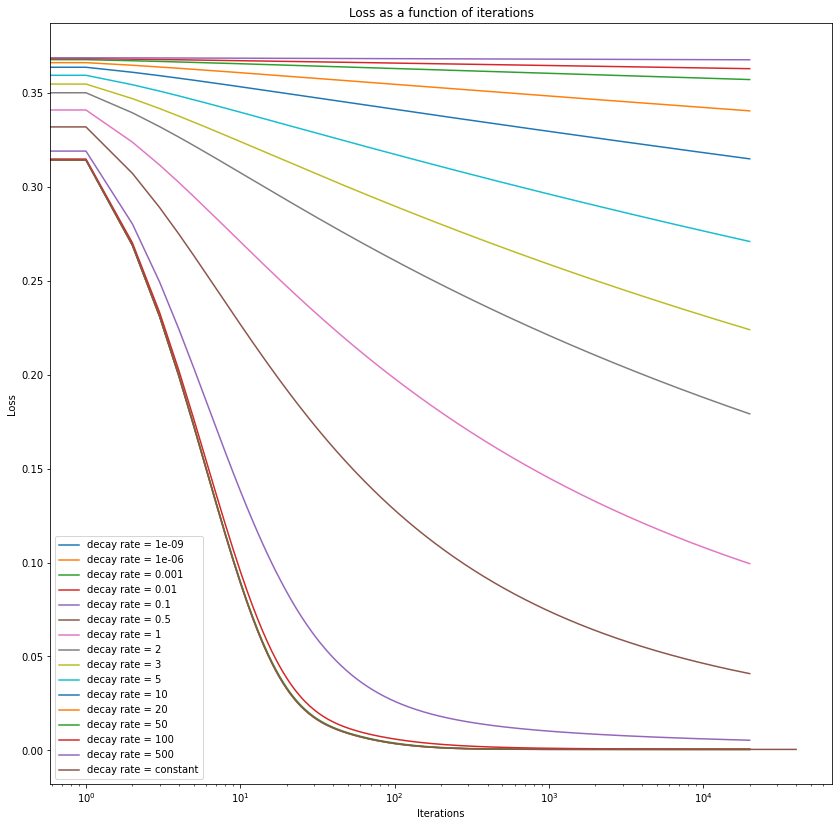

CPU times: user 1.11 s, sys: 45.6 ms, total: 1.15 s
Wall time: 1.18 s


In [241]:
%%time

plt.figure(0, figsize=(14, 14))
for decay_rate, values in decay_rate_dict.items():
    plt.plot(np.arange(len(values['J_history'])), values['J_history'], label=f'decay rate = {decay_rate}')

plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')
plt.legend()
plt.show()

### Plot the validation loss of different decat rate

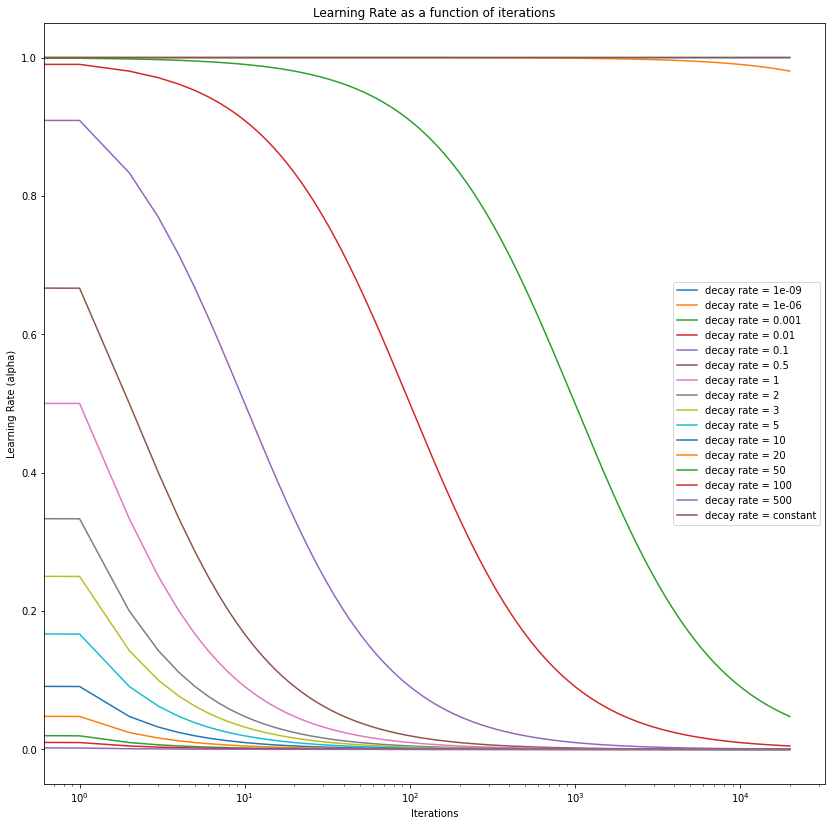

CPU times: user 1.48 s, sys: 66 ms, total: 1.54 s
Wall time: 1.66 s


In [242]:
%%time

plt.figure(0, figsize=(14, 14))
for decay_rate, values in decay_rate_dict.items():
    plt.plot(np.arange(len(values['alpha_history'])), values['alpha_history'], label=f'decay rate = {decay_rate}')

plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Learning Rate (alpha)')
plt.title('Learning Rate as a function of iterations')
plt.legend()
plt.show()